In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 - Load dataset

In [2]:
us_flights = pd.read_csv("us_flights.csv", parse_dates=[0])

2 - Use info() and describe()

In [3]:
print(us_flights.info())
print(us_flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                450017 non-null  datetime64[ns]
 1   UNIQUE_CARRIER         450017 non-null  object        
 2   AIRLINE_ID             450017 non-null  int64         
 3   TAIL_NUM               449378 non-null  object        
 4   FL_NUM                 450017 non-null  int64         
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64         
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64         
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64         
 8   ORIGIN                 450017 non-null  object        
 9   ORIGIN_CITY_NAME       450017 non-null  object        
 10  DEST_AIRPORT_ID        450017 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64         
 12  DEST_CITY_MARKET_ID    450017 non-null  int6

3 - Filter out all cancelled flights

In [4]:
mask = (us_flights['CANCELLED'] == 1)
us_flights.drop(us_flights[mask].index, inplace=True)

4 - queries 1

In [5]:
carriers_flight_count = us_flights.groupby("UNIQUE_CARRIER")["UNIQUE_CARRIER"].count()
print(carriers_flight_count)

UNIQUE_CARRIER
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: UNIQUE_CARRIER, dtype: int64


In [6]:
carriers_delay_mean = us_flights.groupby("UNIQUE_CARRIER")["DEP_DELAY", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"].mean()
print(carriers_delay_mean)

                DEP_DELAY  ARR_DELAY  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
UNIQUE_CARRIER                                                                  
AA               7.466917   3.307004      18.736410       2.352168  15.370026   
AS               5.220769   3.311553      11.736505       3.820850  18.615047   
B6              14.132533   8.423231      20.297641       1.436562  15.223725   
DL              13.512205   4.305279      30.858959       9.572160  16.836252   
EV              17.687791  13.173011      36.329407       1.368504  15.794439   
F9              16.566333  12.076791      16.748299       0.870295  19.070295   
HA               2.916427   3.617181      29.941714       0.897143   0.251429   
NK              11.680600   8.993642       9.080825       0.732499  43.840041   
OO              15.194941  12.528524      23.495640       4.633053  15.186582   
UA              13.614095   4.911975      21.436417       2.568226  21.186162   
VX              17.792383  1

C:\Users\bruno\AppData\Local\Temp\ipykernel_1212\1642541414.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  carriers_delay_mean = us_flights.groupby("UNIQUE_CARRIER")["DEP_DELAY", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"].mean()


5 - Add 2 new columns: WEEKDAY and DELAY_DELTA

In [7]:
us_flights.insert(1, 'WEEKDAY', us_flights.iloc[:,0].dt.dayofweek)
us_flights.insert(us_flights.columns.get_loc('ARR_DELAY')+1, 'DELAY_DELTA', abs(us_flights['ARR_DELAY']-us_flights['DEP_TIME']))

6 - Visualise arrival delay as a function of the day of week

In [8]:
days_delays = us_flights.loc[:,['FL_DATE', 'ARR_DELAY']]
days_delays.insert(1, 'WEEKDAY', days_delays.iloc[:,0].dt.day_name())
days_delays.insert(1, 'WEEKDAY_NUMBER', days_delays.iloc[:,0].dt.dayofweek)
days_delays_mean = days_delays.loc[:,['WEEKDAY', 'ARR_DELAY', 'WEEKDAY_NUMBER']].groupby('WEEKDAY').mean().sort_values('WEEKDAY_NUMBER')

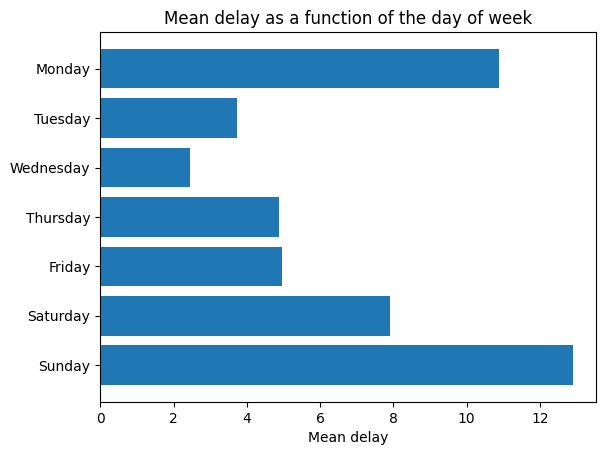

In [9]:
fig, ax = plt.subplots()
indices = days_delays_mean.index
y_pos = np.arange(len(indices))
ax.barh(y_pos, days_delays_mean.iloc[:,0])
ax.invert_yaxis()
ax.set_yticks(y_pos, indices)
ax.set_xlabel('Mean delay')
ax.set_title('Mean delay as a function of the day of week')
plt.show()

7 - Carriers mean delays during weekend end working days

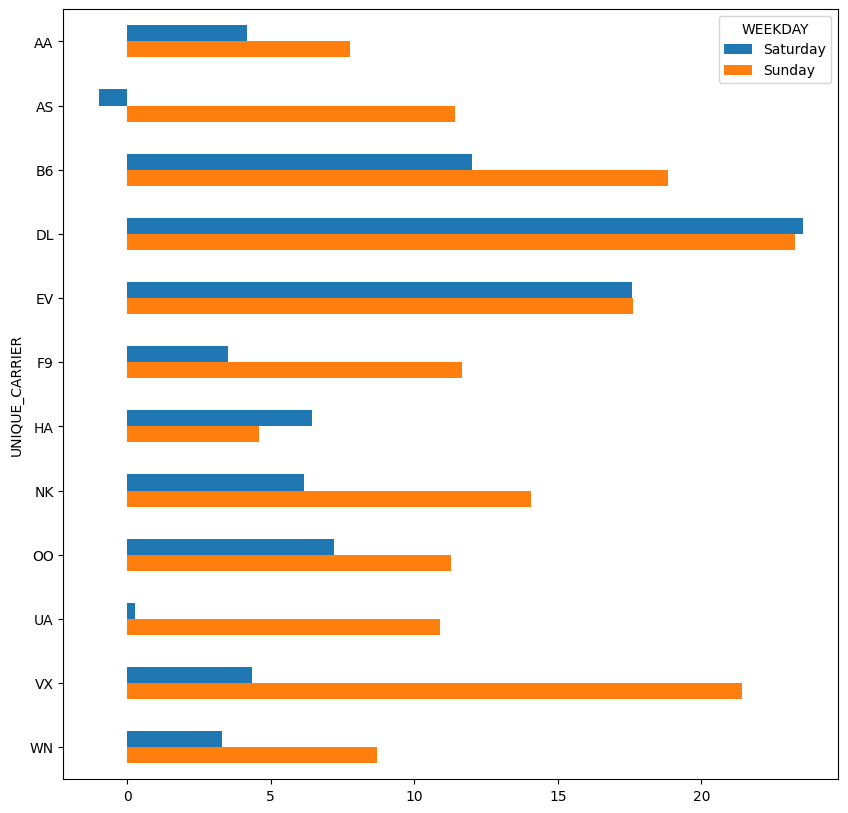

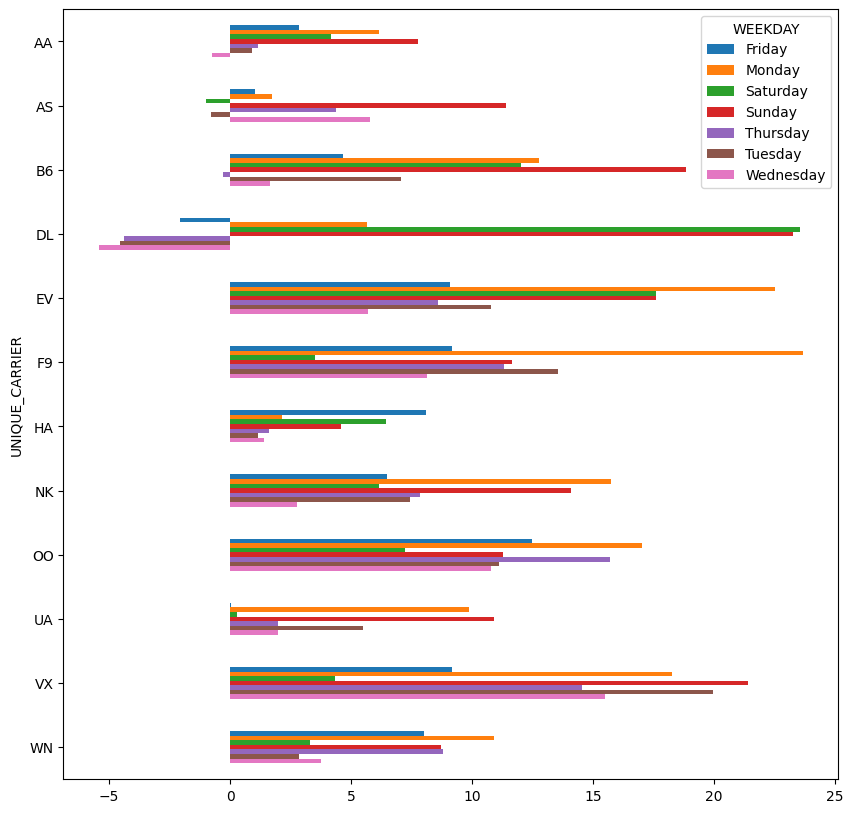

In [10]:
weekenddays_delays = us_flights.loc[:,['UNIQUE_CARRIER','FL_DATE', 'ARR_DELAY']]
weekenddays_delays.insert(2, 'WEEKDAY', weekenddays_delays.iloc[:,1].dt.day_name())
weekenddays_delays.insert(2, 'WEEKDAY_NUMBER', weekenddays_delays.iloc[:,1].dt.dayofweek)
weekenddays_delays.drop(columns='FL_DATE', inplace=True)
mask1 = (weekenddays_delays['WEEKDAY_NUMBER'] <= 6) & (weekenddays_delays['WEEKDAY_NUMBER'] >= 5)
weekenddays_delays = weekenddays_delays.loc[mask1, :].sort_values(['UNIQUE_CARRIER', 'WEEKDAY_NUMBER'])
weekenddays_delays_mean = weekenddays_delays.pivot_table(values='ARR_DELAY', index='UNIQUE_CARRIER', columns=['WEEKDAY'], aggfunc='mean')
weekenddays_delays_mean.plot(kind='barh', figsize=(10, 10)).invert_yaxis()

workingdays_delays = us_flights.loc[:,['UNIQUE_CARRIER','FL_DATE', 'ARR_DELAY']]
workingdays_delays.insert(2, 'WEEKDAY', workingdays_delays.iloc[:,1].dt.day_name())
workingdays_delays.insert(2, 'WEEKDAY_NUMBER', workingdays_delays.iloc[:,1].dt.dayofweek)
workingdays_delays.drop(columns='FL_DATE', inplace=True)
mask2 = workingdays_delays['WEEKDAY_NUMBER'] < 5
workingdays_delays_mean = workingdays_delays.loc[mask2, :].sort_values(['UNIQUE_CARRIER', 'WEEKDAY_NUMBER'])
workingdays_delays_mean = workingdays_delays.pivot_table(values='ARR_DELAY', index='UNIQUE_CARRIER', columns=['WEEKDAY'], aggfunc='mean')
workingdays_delays_mean.plot(kind='barh', figsize=(10, 10)).invert_yaxis()

8 - Multi-index composed dataframe

In [11]:
df8 = us_flights.set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
print(df8)

                                       WEEKDAY  AIRLINE_ID TAIL_NUM  FL_NUM  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                            
AA             JFK    LAX  2017-01-01        6       19805   N787AA       1   
               LAX    JFK  2017-01-01        6       19805   N783AA       2   
                           2017-01-01        6       19805   N791AA       4   
               DFW    HNL  2017-01-01        6       19805   N391AA       5   
               OGG    DFW  2017-01-01        6       19805   N346AA       6   
...                                        ...         ...      ...     ...   
NK             FLL    MSP  2017-01-31        1       20416   N625NK     596   
               MSP    FLL  2017-01-31        1       20416   N613NK     597   
               ATL    PHL  2017-01-31        1       20416   N505NK     600   
               FLL    ATL  2017-01-31        1       20416   N505NK     600   
                      LGA  2017-01-31        1      

9 - Query

In [12]:
mask = ((us_flights['UNIQUE_CARRIER'] == 'AA') | (us_flights['UNIQUE_CARRIER'] == 'DL')) & (us_flights['ORIGIN'] == 'LAX')
df9 = us_flights.loc[mask, ['UNIQUE_CARRIER', 'FL_DATE', 'DEP_TIME', 'DEP_DELAY']]
df9.set_index(['UNIQUE_CARRIER', 'FL_DATE'], inplace=True)

10 - Mean arrival delay for flights in the first week of the month, origin = LAX

In [13]:
mask = (us_flights['ORIGIN'] == 'LAX') & (us_flights['FL_DATE'].apply(lambda d: (d.day - 1)//7 + 1) == 1)
df10 = us_flights.loc[mask, ['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df10.insert(1, 'DEL_MEAN', df10.mean(axis=1))
df10 = df10.iloc[:,0:2:]
print(df10)

          FL_DATE   DEL_MEAN
1      2017-01-01  16.857143
2      2017-01-01  19.285714
8      2017-01-01 -15.000000
16     2017-01-01   0.500000
19     2017-01-01   7.428571
...           ...        ...
100693 2017-01-07  13.857143
100694 2017-01-07  37.285714
100695 2017-01-07  12.500000
100696 2017-01-07  12.000000
100697 2017-01-07  23.714286

[3950 rows x 2 columns]


C:\Users\bruno\AppData\Local\Temp\ipykernel_1212\3763686499.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df10.insert(1, 'DEL_MEAN', df10.mean(axis=1))


11 - Pivot table for each carrier for each day of the week showing the number of departures

In [14]:
us_flights.insert(2, 'DAY_NAME', us_flights.iloc[:,0].dt.day_name())

<AxesSubplot: xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

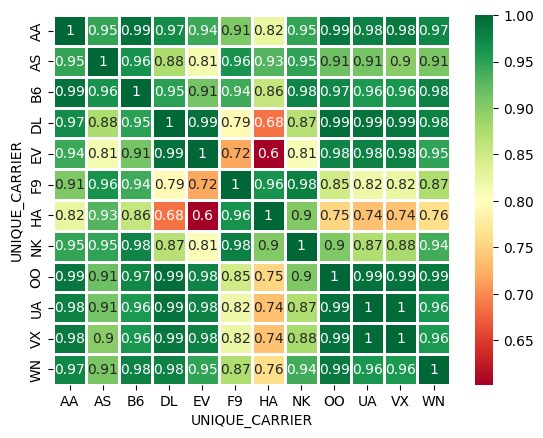

In [15]:
df11 = us_flights.sort_values(['UNIQUE_CARRIER', 'WEEKDAY']).pivot_table(index='UNIQUE_CARRIER', columns=['WEEKDAY', 'DAY_NAME'], aggfunc={'FL_DATE': 'count'})
# print(df11)
corr_df11 = df11.T.corr()
sns.heatmap(corr_df11, cmap='RdYlGn', linewidths=1, annot=True)